In [1]:
import numpy as np
import matplotlib.pyplot as plt

E_max = 52.8  # MeV

def michel_pdf(E):
    x = E / E_max
    return x**2 * (3 - 2 * x)

# Envelope function: max of the Michel spectrum is at x = 0.5
f_max = michel_pdf(E_max * 0.5)

def sample_michel(n_samples):
    samples = []
    while len(samples) < n_samples:
        E = np.random.uniform(0, E_max)
        y = np.random.uniform(0, f_max)
        if y < michel_pdf(E):
            samples.append(E)
    return np.array(samples)


(array([ 11.,  23.,  46.,  87., 128., 144., 130., 138., 152., 141.]),
 array([ 2.64293317,  7.64873638, 12.65453959, 17.66034281, 22.66614602,
        27.67194923, 32.67775244, 37.68355566, 42.68935887, 47.69516208,
        52.70096529]),
 <BarContainer object of 10 artists>)

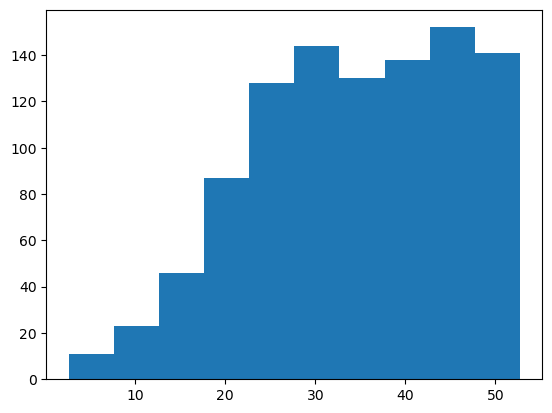

In [2]:
plt.hist(sample_michel(1000))

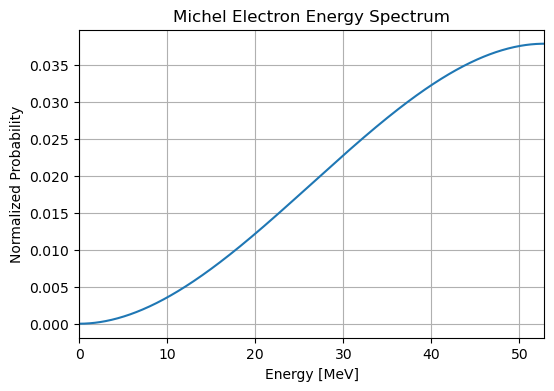

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set constants
E_max = 52.8  # MeV
n_bins = 529

# Step 2: Create energy array (bin centers)
energy = np.linspace(0, E_max, n_bins)

# Step 3: Define the Michel PDF
def michel_pdf(E):
    x = E / E_max
    return x**2 * (3 - 2 * x)

# Step 4: Compute unnormalized probabilities
unnorm_prob = michel_pdf(energy)

# Step 5: Normalize to get a proper PDF (area under curve = 1)
bin_width = energy[1] - energy[0]
probability = unnorm_prob / (np.sum(unnorm_prob) * bin_width)

# (Optional) Plot to verify
plt.figure(figsize=(6,4))
plt.plot(energy, probability)
plt.xlabel("Energy [MeV]")
plt.ylabel("Normalized Probability")
plt.title("Michel Electron Energy Spectrum")
plt.grid(True)
plt.xlim(0,52.8)
plt.show()


In [8]:
# Print energy array as comma-separated values
print("energy =")
print(','.join(f"{e:.6f}" for e in energy))

# Print probability array as comma-separated values
print("\nprobability =")
print(','.join(f"{p:.8f}" for p in probability))
print(np.sum(probability))

energy =
0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000,1.100000,1.200000,1.300000,1.400000,1.500000,1.600000,1.700000,1.800000,1.900000,2.000000,2.100000,2.200000,2.300000,2.400000,2.500000,2.600000,2.700000,2.800000,2.900000,3.000000,3.100000,3.200000,3.300000,3.400000,3.500000,3.600000,3.700000,3.800000,3.900000,4.000000,4.100000,4.200000,4.300000,4.400000,4.500000,4.600000,4.700000,4.800000,4.900000,5.000000,5.100000,5.200000,5.300000,5.400000,5.500000,5.600000,5.700000,5.800000,5.900000,6.000000,6.100000,6.200000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.100000,7.200000,7.300000,7.400000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,8.100000,8.200000,8.300000,8.400000,8.500000,8.600000,8.700000,8.800000,8.900000,9.000000,9.100000,9.200000,9.300000,9.400000,9.500000,9.600000,9.700000,9.800000,9.900000,10.000000,10.100000,10.200000,10.300000,10.400000,10.500000,10.600000,10.700000,10.800000,1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


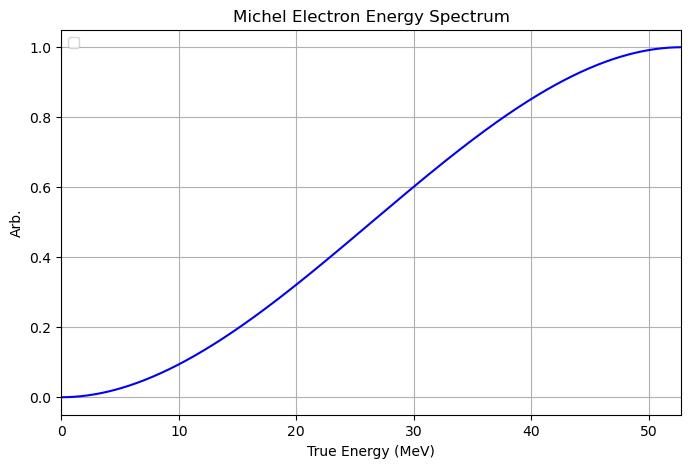

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m_mu = 105.66  # muon mass in MeV
E_max = m_mu / 2  # max electron energy in MeV ~52.8 MeV

# Energy range
E = np.linspace(0, E_max, 1000)

# Michel spectrum (simplified, ignoring electron mass)
dGamma_dE = E**2 * (3 - 4*E/m_mu)

# Normalize for plotting
dGamma_dE /= np.max(dGamma_dE)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(E, dGamma_dE, color='blue')
plt.xlabel('True Energy (MeV)')
plt.ylabel('Arb.')
plt.title('Michel Electron Energy Spectrum')
plt.grid(True)
plt.legend()
plt.xlim(0,52.8)
plt.show();


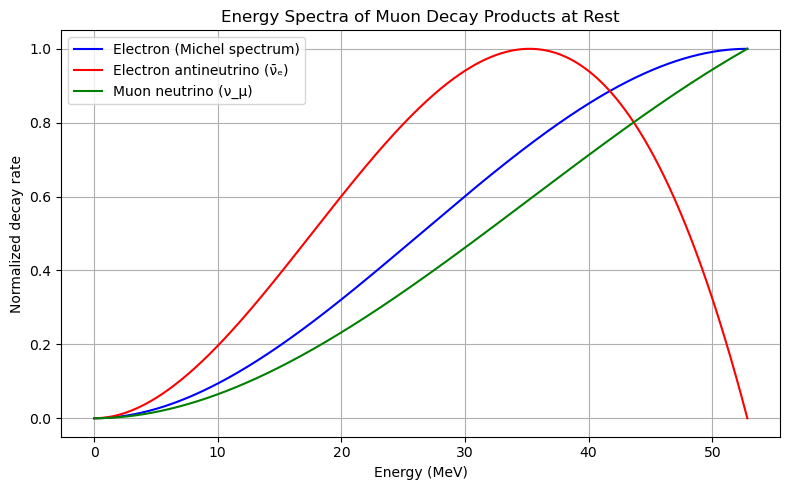

In [6]:
# Neutrino spectra in muon decay at rest (simplified, ignoring masses)
# Shapes taken from theoretical decay distributions

# Electron antineutrino spectrum (ν̄_e)
dGamma_dE_nuebar = E**2 * (1 - 2*E/m_mu)

# Muon neutrino spectrum (ν_μ)
dGamma_dE_numu = E**2 * (1 - E/m_mu)

# Normalize all spectra for comparison
dGamma_dE_nuebar /= np.max(dGamma_dE_nuebar)
dGamma_dE_numu /= np.max(dGamma_dE_numu)

# Plot all three
plt.figure(figsize=(8, 5))
plt.plot(E, dGamma_dE, label='Electron (Michel spectrum)', color='blue')
plt.plot(E, dGamma_dE_nuebar, label='Electron antineutrino (ν̄ₑ)', color='red')
plt.plot(E, dGamma_dE_numu, label='Muon neutrino (ν_μ)', color='green')
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalized decay rate')
plt.title('Energy Spectra of Muon Decay Products at Rest')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
